In [52]:
# DS L3T08
# Capstone I - Classification

# MNIST Logistic Regression & Decision Trees

In [53]:
# Import libraries
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# Load the dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name = 'mnist_784')

The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

In [55]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , mnist.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", mnist.target.shape)

Image Data Shape (70000, 784)
Label Data Shape (70000,)


# Create features and labels. Split the data into a training, development and test set.

In [56]:
# Create x (independent) and y (dependent) variables
X = mnist['data']
y = mnist['target']

In [57]:
# Normalise data

# convert y into an int datatype
y = y.astype('int32')

# Standardise data by dividing by 255
X = X/ 255.0 # values between 0 and 1

In [58]:
# Train, dev and test split

# Create a train test dev/cv split (0.6, 0.2, 0.2)
SEED=21

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=SEED)

print ("Training data: ", X_train.shape, y_train.shape)
print ("Test data: ", X_test.shape, y_test.shape)
print ("Validation data: ", X_val.shape, y_val.shape)

Training data:  (44800, 784) (44800,)
Test data:  (14000, 784) (14000,)
Validation data:  (11200, 784) (11200,)


# Two Machine Learning Algos chosen


# 1) Decision Trees

A) Decision Trees chosen as using a decision tree for classification is an alternative methodology to logistic regression. Can handle data of different types, including continuous, categorical, ordinal, and binary. Transformations of the data are not required. Can be useful for detecting important variables, interactions, and identifying outliers.
(https://webfocusinfocenter.informationbuilders.com/wfappent/TLs/TL_rstat/source/DecisionTree47.htm)

In [29]:
# Train and Fit the Decision Tree model
# without pruning

unpruned = DecisionTreeClassifier(max_depth=None)
unpruned.fit(X_train, y_train)

print("At depth:", unpruned.tree_.max_depth)
print("Decision Tree Accuracy on the Train set (without pruning): ", unpruned.score(X_train, y_train))
print("Decision Tree Accuracy on the Dev set(without pruning):", unpruned.score(X_val, y_val))

At depth: 45
Decision Tree Accuracy on the Train set (without pruning):  1.0
Decision Tree Accuracy on the Dev set(without pruning): 0.8641071428571429


In [30]:
# Build model and append scores to a list
pruned_depths = range(2, 15)

# Stored in a list
pruned_scores_train = []
pruned_scores_dev = []

# Create and fit the model
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d)
  clf.fit(X_train, y_train)
    
# Append the scores in the list
  score = clf.score(X_train, y_train)
  pruned_scores_train.append(score)
    
  score = clf.score(X_val, y_val)
  pruned_scores_dev.append(score)

B) Parameter to tune - Pruning depth

Pruning depth chosen because it simplifies, compresses and optimises the Decision tree by removing sections of the tree that are uncritical and redundant to classify. 

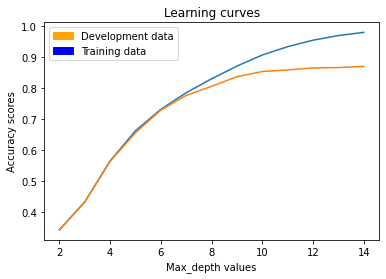

In [31]:
# Plot learning curves from pruned scores
fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores_train)
ax.plot(pruned_depths, pruned_scores_dev)

plt.xlabel("Max_depth values")
plt.ylabel("Accuracy scores")
plt.title("Learning curves")

import matplotlib.patches as mpatches
orange = mpatches.Patch(color='orange', label='Development data')
blue = mpatches.Patch(color='blue', label='Training data')
plt.legend(handles=[orange, blue])

Training curve performs better however the performance of the Dev dataset curve is almost as good. Best perormance reached at a depth of 13.

C) Choose which value for the parameter to set for testing on the test data

In [32]:
# Identify max_depth
best_depth = pruned_depths[np.argmax(pruned_scores_dev)]
print('Best performance reached at depth of: ', best_depth)

# Stored in a list
pruned_scores_test = []

# Retrain the pruned model with best depth
pruned = DecisionTreeClassifier(max_depth=best_depth)
pruned.fit(X, y)

Best performance reached at depth of:  14


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
# Make predictions for test dataset
y_pred = pruned.predict(X_test)

# Store to the list
score = pruned.score(X_test, y_pred)
pruned_scores_test.append(score)

In [34]:
# Accuracy of the final model
print("Decision Tree Accuracy (after pruning) on test data: ", pruned.score(X_test, y_pred))

Decision Tree Accuracy (after pruning) on test data:  1.0


D) Confusion Matrix

In [35]:
# Confusion matrix comparing the predictions to the gold labels
from sklearn.metrics import confusion_matrix

classes = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

conf_mat = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(conf_mat, columns=classes, index=classes)
cm_df

,1,2,3,4,5,6,7,8,9,10
1,1371,0,1,0,0,0,1,0,0,1
2,0,1569,3,2,5,2,1,2,0,0
3,4,4,1355,4,4,1,0,7,5,5
4,5,2,12,1354,8,17,4,7,10,9
5,3,1,1,2,1327,1,2,1,7,16
6,2,1,3,6,5,1240,8,1,5,4
7,5,4,2,1,2,4,1377,2,3,1
8,0,1,7,8,7,0,2,1411,1,10
9,1,11,10,3,9,5,4,1,1312,10
10,2,0,4,7,15,17,1,10,0,1319


E) Report which classes the models struggle with the most

In [36]:
# Determine the hardest class

# Average f1 score
av_f1 = f1_score(y_test, y_pred, average='micro')
print('F1-score: ', av_f1)

# F1-score per class
f = f1_score(y_test, y_pred, average=None)
lowest_score = min(f)
hardest_class = classes[list(f).index(lowest_score)]
print('Hardest class the models struggled with:', hardest_class)

F1-score:  0.9739285714285715
Hardest class the models struggled with: 10


F) Accuracy, Precision, Recall and F1-score

In [37]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y, pruned.predict(X)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6903
           1       0.98      0.99      0.99      7877
           2       0.97      0.98      0.97      6990
           3       0.97      0.96      0.97      7141
           4       0.96      0.97      0.97      6824
           5       0.97      0.97      0.97      6313
           6       0.98      0.98      0.98      6876
           7       0.98      0.98      0.98      7293
           8       0.98      0.96      0.97      6825
           9       0.96      0.96      0.96      6958

    accuracy                           0.97     70000
   macro avg       0.97      0.97      0.97     70000
weighted avg       0.97      0.97      0.97     70000



Report on the scores for Decision Trees model:

The Decision Tree was applied on the Train and Dev data without pruning, using a flat dataset. The train and dev scores are good. After pruning the model, and making predications on X, we applied the learning y and on the test data.

At depth: 45

- Decision Tree Accuracy on the Train set (without pruning):  1.0

- Decision Tree Accuracy on the Dev set(without pruning): 0.8641071428571429


Best performance reached at depth of:  14  ---- Test score - Decision Tree Accuracy (after pruning) on test data:  1.0

F1-score:  0.9739285714285715
Hardest class the models struggled with: 10

The Classification Report gives us a good indication of the other scores achieved.

# 2) Logistic Regression

A) Logistic Regression chosen because it is used as a baseline when comparing other models. Logistic Regression is also used when most dependent variables are numeric.

In [59]:
# Build and fit the Logistic Regression model
log_reg = LogisticRegression( solver='lbfgs', penalty='none')
log_reg.fit(X_train, y_train)

C:\Users\avesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

B) Hyperparameter Tuning - Solvers

Differences in performance or convergence with different Solvers:

- solver in [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]
Regularization (penalty) can sometimes be helpful.

- penalty in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]
Note: not all solvers support all regularization terms.

- The C parameter controls the penality strength, which can also be effective.

    C in [100, 10, 1.0, 0.1, 0.01]


C) Choose which value for the parameter to set for testing on the test data

In [60]:
# Build and fit using Solvers in Logistic Regression
solvers = ["newton-cg", "sag", "lbfgs", "liblinear"]
train_score, dev_score = [], []

for solver in solvers:
    log_reg = LogisticRegression(solver=solver, max_iter=200)
    
    log_reg.fit(X_train, y_train)
     
    # Append the scores in the list
    score = log_reg.score(X_train, y_train)
    train_score.append(score)
    
    score = log_reg.score(X_val, y_val)
    dev_score.append(score)

C:\Users\avesh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\avesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


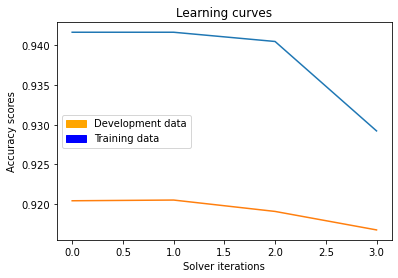

In [69]:
plt.plot(train_score)
plt.plot(dev_score)

plt.xlabel("Solver iterations")
plt.ylabel("Accuracy scores")
plt.title("Learning curves")

import matplotlib.patches as mpatches
orange = mpatches.Patch(color='orange', label='Development data')
blue = mpatches.Patch(color='blue', label='Training data')
plt.legend(handles=[orange, blue])

In [70]:
print("Logistic Regression Accuracy Train set: ", log_reg.score(X_train, y_train))
print("Logistic Regression Accuracy Dev set:", log_reg.score(X_val, y_val))

Logistic Regression Accuracy Train set:  0.92921875
Logistic Regression Accuracy Dev set: 0.9167857142857143


In [71]:
# make predictions on test data
y_pred = log_reg.predict(X_test)

In [72]:
# Evaluate the Model Accuracy

# Comparing y test to y predict
print("Logistic Regression Model Accuracy (after tuning solver) on test data: ", metrics.accuracy_score(y_test, y_pred))

Logistic Regression Model Accuracy (after tuning solver) on test data:  0.9170714285714285


D) Confusion Matrix

In [73]:
# Confusion matrix comparing the predictions to the gold labels
from sklearn.metrics import confusion_matrix

classes = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

conf_mat = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(conf_mat, columns=classes, index=classes)
cm_df

,1,2,3,4,5,6,7,8,9,10
1,1329,1,9,1,1,7,8,4,13,1
2,0,1541,8,2,3,3,5,2,16,4
3,10,14,1240,28,19,7,14,22,30,5
4,3,6,43,1268,4,36,9,12,27,20
5,4,4,13,2,1271,1,8,6,15,37
6,13,11,11,40,17,1108,26,7,31,11
7,10,1,7,1,9,15,1349,2,7,0
8,9,12,13,2,12,3,0,1365,4,27
9,14,37,16,44,12,38,15,11,1150,29
10,8,7,3,26,36,11,1,48,17,1218


Looking at the confusion matrix is one way of inspecting performance in more detail. Looking at the f1 score,
precision and recall are another way. The imperfect average f1 score tells us not all instances were classified perfectly, and the per-class f1 scores tells us which classes were the most problematic.

E) Report which classes the models struggle with the most

In [74]:
# Determine the hardest class

# Average f1 score
av_f1 = f1_score(y_test, y_pred, average='micro')
print('F1-score: ', av_f1)

# F1-score per class
f = f1_score(y_test, y_pred, average=None)
lowest_score = min(f)
hardest_class = classes[list(f).index(lowest_score)]
print('Hardest class:', hardest_class)

F1-score:  0.9170714285714285
Hardest class: 9


F)  Accuracy, Precision, Recall and F1-score

In [75]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y, log_reg.predict(X)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6903
           1       0.95      0.98      0.96      7877
           2       0.92      0.90      0.91      6990
           3       0.91      0.89      0.90      7141
           4       0.92      0.94      0.93      6824
           5       0.90      0.88      0.89      6313
           6       0.95      0.96      0.95      6876
           7       0.94      0.94      0.94      7293
           8       0.89      0.87      0.88      6825
           9       0.90      0.89      0.90      6958

    accuracy                           0.92     70000
   macro avg       0.92      0.92      0.92     70000
weighted avg       0.92      0.92      0.92     70000



Report on the scores for Logistic Regression model using Solvers to tune:
- Dev score - Logistic Regression Accuracy Train set:  0.92921875
- Train score - Logistic Regression Accuracy Dev set: 0.9167857142857143
- Test score - Logistic Regression Model Accuracy (after tuning solver):  0.9170714285714285

F1-score:  0.9170714285714285
Hardest class: 9

Refer to Classification Report above

# Comment on the differences in performance and report which model you believe did the best job.

Decision Tree with Pruning versus Logistic Regression with Solvers:

- Looking at the summaries for each model, the Decision Tree seems to have performed slightly better in accuracies.

The F1 score can be interpreted as a weighted average of the precision and recall values, where an F1 score reaches its best value at 1. The Decision tree F1 score performed better in this instance.